In [16]:
def plot_settings(style='seaborn-whitegrid'):
    """
    Common rcParams for plot styling
    """
    import matplotlib as mpl
    
    mpl.style.use(style)
    mpl.rcParams['font.weight']= 'bold'
    mpl.rcParams['font.size']= 16

In [1]:
import pandas as pd
%matplotlib inline
             
data = pd.read_feather("../data/aeolus_top5drugs.feather")

In [31]:
def freqXbyY(data,x = 'drug_concept_id',y = 'report_year'):
    """
    helper groupby x and count y method
    """
    
    return data.groupby(x)[y].count()

In [32]:
grpd = freqXbyY(data,'drug_concept_id','id')

In [33]:
import ipywidgets as w

In [34]:
drugs = grpd.index.values
d = w.Dropdown(options = drugs)

In [35]:
d

Dropdown(options=(923645, 956874, 1112807, 1125315, 1501700), value=923645)

In [36]:
drug = d.label
ry_grpd = data.query('drug_concept_id==@drug').groupby('report_year')['report_year'].count()

In [37]:
plot_settings()

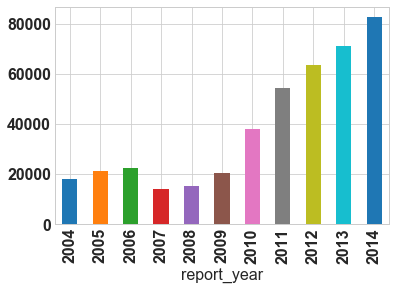

In [38]:
ry_grpd.plot(kind='bar')